In [ ]:
#LECTURE 2

In [ ]:
#We'll use the famous MNIST Handwritten Digits Database as our training dataset. It consists of 28px by 28px grayscale images of 
#handwritten digits (0 to 9) and labels for each image indicating which digit it represents.
#https://jovian.ai/outlink?url=http%3A%2F%2Fyann.lecun.com%2Fexdb%2Fmnist%2F

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST #dataset

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
#The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images
#used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the MNIST
#class by passing train=False to the constructor.
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
#sample element from dataset
dataset[0]
#It's a pair, consisting of a 28x28px image and a label.

(<PIL.Image.Image image mode=L size=28x28 at 0x7F434C734890>, 5)

Label: 5


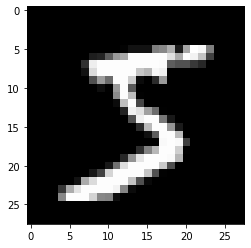

In [7]:
#We can view the image within Jupyter using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [8]:
#PyTorch doesn't know how to work with images. 
#We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.
import torchvision.transforms as transforms

# MNIST dataset (images and labels), convert to tensor
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [9]:
#Just tensor of above image
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [10]:
#The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels.
#The second and third dimensions represent pixels along the height and width of the image, respectively.
#Since images in the MNIST dataset are grayscale, there's just one channel. 
#Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).

#Lets look at some values inside thw tensor
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))
#The values range from 0 to 1, with 0 representing black, 1 white

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


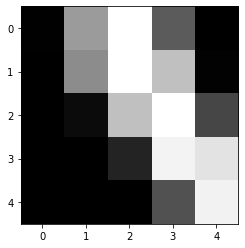

In [11]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');
#pass just the 28x28 matrix to plt.imshow, without a channel dimension

In [12]:
#In the MNIST dataset, there are 60,000 training images and 10,000 test images
#Validation set - used to evaluate the model during training, adjust hyperparameters, to choose best model

#manually split the 60,000 images into training and validation dataset
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
#Data Loader
#load data in batches of 128
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
#shuffle True so batches generated in each epoch are different
# This randomization helps generalize & speed up the training process
val_loader = DataLoader(val_ds, batch_size)

In [14]:
#Model
#logistic regression model is almost identical to a linear regression model. 
#It contains weights and bias matrices, and the output is obtained using simple
#matrix operations (pred = x @ w.t() + b

#nn.Linear expects each training example to be a vector, each 1x28x28 image tensor is flattened into a vector of size 784 (28*28)
#output for each image is a vector of size 10, with each element signifying the probability 
#of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [15]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0112, -0.0074,  0.0317,  ...,  0.0091,  0.0071, -0.0247],
        [-0.0076,  0.0079, -0.0012,  ...,  0.0239, -0.0199,  0.0242],
        [ 0.0069,  0.0240, -0.0241,  ..., -0.0203, -0.0261,  0.0130],
        ...,
        [ 0.0118,  0.0275,  0.0009,  ..., -0.0190, -0.0015,  0.0229],
        [ 0.0011,  0.0012,  0.0030,  ..., -0.0224,  0.0207,  0.0166],
        [ 0.0002, -0.0238,  0.0265,  ..., -0.0142, -0.0250, -0.0141]],
       requires_grad=True)

In [16]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0273, -0.0083,  0.0050,  0.0235,  0.0057, -0.0241,  0.0201,  0.0241,
        -0.0129, -0.0258], requires_grad=True)

In [ ]:
#Pass first batch into model
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break
#GIVES ERROR - need to reshape images
#Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e.,
#we need to flatten them. We'll use the .reshape method of a tensor, which will allow us
#to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. 

#To include this additional functionality within our model, we need to define a 
#custom model by extending the nn.Module class from PyTorch.

In [19]:
#Custom model extendin nn.Module class from PyTorch
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        #instantiate the weights and biases
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        #we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784).
        #One argument to .reshape can be set to -1 (in this case, the first dimension) to 
        #let PyTorch figure it out automatically based on the shape of the original tensor.
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [20]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0205,  0.0212,  0.0280,  ...,  0.0207, -0.0031, -0.0090],
         [-0.0142,  0.0045,  0.0137,  ...,  0.0242, -0.0087,  0.0186],
         [-0.0046, -0.0177,  0.0030,  ..., -0.0139, -0.0112,  0.0039],
         ...,
         [ 0.0199,  0.0177, -0.0292,  ...,  0.0344,  0.0257,  0.0029],
         [-0.0011, -0.0111, -0.0313,  ..., -0.0165, -0.0206, -0.0020],
         [-0.0055,  0.0201, -0.0074,  ..., -0.0049, -0.0197,  0.0046]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0127, -0.0244, -0.0073, -0.0074, -0.0148, -0.0146, -0.0182,  0.0085,
         -0.0268, -0.0017], requires_grad=True)]

In [21]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 1.0921e-01, -2.2319e-01,  2.4034e-01,  2.0534e-02, -2.7347e-01,
          2.3179e-01, -2.1573e-01, -6.1301e-05, -3.3914e-01,  2.0628e-01],
        [ 3.4796e-02, -4.9411e-02,  7.5483e-02, -2.0586e-01, -9.9255e-02,
          4.6067e-01, -1.3344e-01, -2.2493e-01,  1.0932e-01, -2.0420e-02]])


In [22]:
#For each of the 100 input images, we get 10 outputs, one for each class.
#outputs represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case.
#convert the output rows into probabilities, we use the softmax function

#softmax function is included in the torch.nn.functional package and requires us
#to specify a dimension along which the function should be applied
import torch.nn.functional as F
outputs[:2]

tensor([[ 1.0921e-01, -2.2319e-01,  2.4034e-01,  2.0534e-02, -2.7347e-01,
          2.3179e-01, -2.1573e-01, -6.1301e-05, -3.3914e-01,  2.0628e-01],
        [ 3.4796e-02, -4.9411e-02,  7.5483e-02, -2.0586e-01, -9.9255e-02,
          4.6067e-01, -1.3344e-01, -2.2493e-01,  1.0932e-01, -2.0420e-02]],
       grad_fn=<SliceBackward0>)

In [23]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1118, 0.0802, 0.1275, 0.1023, 0.0763, 0.1264, 0.0808, 0.1002, 0.0714,
         0.1232],
        [0.1021, 0.0939, 0.1064, 0.0803, 0.0893, 0.1563, 0.0863, 0.0788, 0.1100,
         0.0966]])
Sum:  1.0


In [25]:
#determine the predicted label for each image by simply choosing the index of the
#element with the highest probability in each output row.
max_probs, preds = torch.max(probs, dim=1)
print(preds)#predicted labels
print(max_probs)
labels#actual labels

#Most of the predicted labels are different from the actual labels. That's because
#we have started with randomly initialized weights and biases. We need to train the 
#model, i.e., adjust the weights using gradient descent to make better predictions.

tensor([2, 5, 9, 8, 0, 2, 1, 7, 5, 2, 7, 5, 7, 0, 5, 9, 7, 2, 9, 7, 5, 2, 9, 5,
        5, 5, 1, 5, 8, 5, 7, 5, 7, 7, 5, 5, 7, 9, 5, 9, 1, 5, 5, 5, 2, 5, 9, 5,
        5, 5, 2, 9, 9, 5, 5, 0, 5, 9, 2, 5, 5, 5, 7, 7, 5, 0, 5, 0, 5, 0, 5, 5,
        5, 5, 5, 9, 5, 2, 5, 8, 7, 7, 5, 0, 5, 5, 5, 5, 5, 1, 5, 7, 9, 1, 9, 5,
        7, 2, 5, 7, 5, 5, 7, 9, 5, 5, 5, 9, 7, 0, 5, 7, 5, 7, 7, 5, 5, 7, 5, 2,
        5, 0, 5, 8, 7, 9, 5, 2])
tensor([0.1275, 0.1563, 0.1384, 0.1237, 0.1298, 0.1278, 0.1214, 0.1362, 0.1578,
        0.1422, 0.1271, 0.1258, 0.1420, 0.1228, 0.1288, 0.1203, 0.1527, 0.1199,
        0.1328, 0.1347, 0.1404, 0.1188, 0.1207, 0.1205, 0.1212, 0.1279, 0.1326,
        0.1152, 0.1267, 0.1407, 0.1203, 0.1749, 0.1286, 0.1316, 0.1384, 0.1822,
        0.1262, 0.1313, 0.1183, 0.1320, 0.1299, 0.1282, 0.1611, 0.1598, 0.1347,
        0.1330, 0.1218, 0.1365, 0.1264, 0.1179, 0.1253, 0.1525, 0.1456, 0.1540,
        0.1477, 0.1563, 0.1474, 0.1145, 0.1340, 0.1141, 0.1448, 0.1382, 0.1294,
       

tensor([7, 0, 8, 3, 4, 7, 7, 5, 8, 4, 9, 0, 2, 4, 7, 8, 2, 2, 5, 6, 2, 0, 5, 7,
        1, 3, 9, 5, 0, 4, 0, 8, 6, 9, 7, 0, 4, 6, 9, 9, 7, 5, 9, 8, 4, 1, 4, 2,
        7, 1, 8, 2, 6, 4, 8, 9, 9, 8, 3, 1, 1, 0, 6, 4, 2, 5, 8, 5, 1, 4, 1, 1,
        9, 4, 1, 8, 0, 3, 5, 5, 4, 1, 7, 4, 1, 3, 4, 8, 5, 3, 7, 6, 8, 8, 8, 3,
        3, 9, 7, 9, 1, 6, 2, 4, 8, 0, 5, 9, 4, 9, 2, 6, 1, 2, 4, 5, 0, 7, 7, 9,
        1, 6, 5, 2, 6, 9, 3, 7])

In [26]:
torch.sum(preds == labels)

tensor(12)

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    #we divide by the total number of images to get the accuracy.

accuracy(outputs, labels)

tensor(0.0938)

In [28]:
probs

tensor([[0.1118, 0.0802, 0.1275,  ..., 0.1002, 0.0714, 0.1232],
        [0.1021, 0.0939, 0.1064,  ..., 0.0788, 0.1100, 0.0966],
        [0.0949, 0.0935, 0.1097,  ..., 0.1079, 0.0906, 0.1384],
        ...,
        [0.1183, 0.0877, 0.1192,  ..., 0.1176, 0.0766, 0.1343],
        [0.0907, 0.0819, 0.1228,  ..., 0.0951, 0.0956, 0.0823],
        [0.1013, 0.0952, 0.1392,  ..., 0.1154, 0.0781, 0.0883]],
       grad_fn=<SoftmaxBackward0>)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [29]:
outputs

tensor([[ 1.0921e-01, -2.2319e-01,  2.4034e-01,  ..., -6.1301e-05,
         -3.3914e-01,  2.0628e-01],
        [ 3.4796e-02, -4.9411e-02,  7.5483e-02,  ..., -2.2493e-01,
          1.0932e-01, -2.0420e-02],
        [-7.7793e-02, -9.3257e-02,  6.7000e-02,  ...,  5.0639e-02,
         -1.2421e-01,  2.9919e-01],
        ...,
        [ 1.5197e-01, -1.4722e-01,  1.5986e-01,  ...,  1.4679e-01,
         -2.8168e-01,  2.7895e-01],
        [-1.3137e-01, -2.3379e-01,  1.7107e-01,  ..., -8.4364e-02,
         -7.9283e-02, -2.2879e-01],
        [ 4.3987e-02, -1.7463e-02,  3.6251e-01,  ...,  1.7436e-01,
         -2.1613e-01, -9.3096e-02]], grad_fn=<AddmmBackward0>)

In [31]:
# Loss for current batch of data
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)
#e^-2.23 which is around 0.1 as the predicted probability of the correct label, on average.
# The lower the loss, The better the model.

tensor(2.3118, grad_fn=<NllLossBackward0>)


In [33]:
#TRAINING THE MODEL
#Epoch is a machine learning terminology that refers to the number of passes the
#training data goes through machine learning algorithm during the entire data points
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history
#records the validation loss and metric from each epoch. It returns a history of
#the training, useful for debugging & visualization.

In [34]:
#redefine the MnistModel class to include additional methods
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

result0 = evaluate(model, val_loader)
result0
#Initial accuracy arun 10%

{'val_acc': 0.11056170612573624, 'val_loss': 2.3158211708068848}

In [35]:
#Train for 5 epoch
history1 = fit(5, 0.001, model, train_loader, val_loader)
#About 80% accuracy

Epoch [0], val_loss: 1.9569, val_acc: 0.5980
Epoch [1], val_loss: 1.6895, val_acc: 0.7129
Epoch [2], val_loss: 1.4880, val_acc: 0.7505
Epoch [3], val_loss: 1.3351, val_acc: 0.7753
Epoch [4], val_loss: 1.2171, val_acc: 0.7918


In [36]:
#continue training 4 more times
history2 = fit(5, 0.001, model, train_loader, val_loader)
history3 = fit(5, 0.001, model, train_loader, val_loader)
history4 = fit(5, 0.001, model, train_loader, val_loader)
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1244, val_acc: 0.8047
Epoch [1], val_loss: 1.0499, val_acc: 0.8127
Epoch [2], val_loss: 0.9889, val_acc: 0.8186
Epoch [3], val_loss: 0.9381, val_acc: 0.8225
Epoch [4], val_loss: 0.8951, val_acc: 0.8277
Epoch [0], val_loss: 0.8583, val_acc: 0.8317
Epoch [1], val_loss: 0.8263, val_acc: 0.8362
Epoch [2], val_loss: 0.7983, val_acc: 0.8387
Epoch [3], val_loss: 0.7736, val_acc: 0.8420
Epoch [4], val_loss: 0.7516, val_acc: 0.8436
Epoch [0], val_loss: 0.7318, val_acc: 0.8451
Epoch [1], val_loss: 0.7140, val_acc: 0.8466
Epoch [2], val_loss: 0.6978, val_acc: 0.8481
Epoch [3], val_loss: 0.6830, val_acc: 0.8495
Epoch [4], val_loss: 0.6695, val_acc: 0.8520
Epoch [0], val_loss: 0.6570, val_acc: 0.8523
Epoch [1], val_loss: 0.6455, val_acc: 0.8531
Epoch [2], val_loss: 0.6348, val_acc: 0.8546
Epoch [3], val_loss: 0.6248, val_acc: 0.8561
Epoch [4], val_loss: 0.6156, val_acc: 0.8585


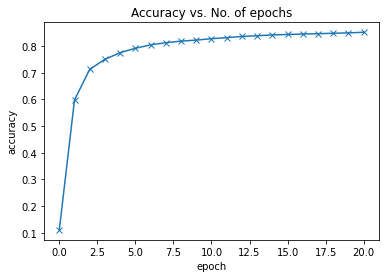

In [37]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
#Clear that model wont cross 90% accuracy this way

#The more likely reason that the model just isn't powerful enough. If you remember
#our initial hypothesis, we have assumed that the output (in this case the class probabilities)
#is a linear function of the input (pixel intensities), obtained by perfoming a matrix
#multiplication with the weights matrix and adding the bias. This is a fairly weak assumption,
#as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents.

Shape: torch.Size([1, 28, 28])
Label: 7
Label: 7 , Predicted: 7


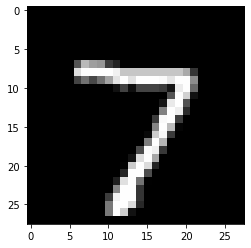

In [38]:
#TEST WITH INDIVIDUAL IMAGES

# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

#Sample image
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

#Function to predict label
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

#Trial
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
#Right

Label: 9 , Predicted: 9


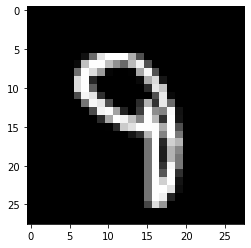

In [39]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
#Wrong

Label: 2 , Predicted: 8


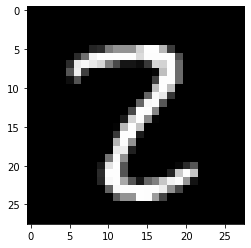

In [40]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))
#Wrong

In [41]:
#Accuracy and loss
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.86572265625, 'val_loss': 0.589422881603241}

In [42]:
#SAVING AND LOADING THE MODEL
#For this to work in Colan allow Google Drive access
#Not doing so in this example

#To save

#The .state_dict method returns an OrderedDict containing all the weights and bias
#  matrices mapped to the right attributes of the model.
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [44]:
#To load
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
print(model2.state_dict())
print(result)

OrderedDict([('linear.weight', tensor([[ 0.0176, -0.0104,  0.0048,  ..., -0.0262,  0.0210, -0.0151],
        [-0.0148, -0.0167,  0.0261,  ...,  0.0136,  0.0045,  0.0035],
        [ 0.0328, -0.0110, -0.0192,  ..., -0.0105, -0.0182,  0.0285],
        ...,
        [ 0.0100,  0.0171, -0.0076,  ...,  0.0349,  0.0343, -0.0352],
        [-0.0129,  0.0345,  0.0357,  ...,  0.0056, -0.0133,  0.0270],
        [-0.0142, -0.0264, -0.0042,  ..., -0.0245, -0.0239,  0.0284]])), ('linear.bias', tensor([-0.0700,  0.0981, -0.0460, -0.0401,  0.0557,  0.0209,  0.0241,  0.0681,
        -0.1397, -0.0176]))])
{'val_loss': 0.589422881603241, 'val_acc': 0.86572265625}
